# <font color = green>Spark Funds Investment Analysis Assignment <font>

##### <font color = green> By: Himanshu Srivastava <font>

## <font color = blue>Project Overview:</font>

You worked for Spark Funds, an [asset management company](https://www.wallstreetmojo.com/what-is-asset-management-company-amc/). Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

##### Spark Funds has two minor constraints for investments:
- They wants to invest between <font color = green>5</font> to <font color = green>15</font> million USD per <font color = green>round</font> of investment
- They wants to invest only <font color = green>in</font> English-speaking countries because of the ease of communication <font color = green>with</font> the companies it would invest <font color = green>in</font>

#### Reference Links
- Real investment data taken from [link](https://www.crunchbase.com/)
- List of countries where English is an official language [link](https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language).

## <font color = blue>Business Objective:</font>

`The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones where most investors are investing.`

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

In [2532]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

In [2533]:
# Now load companies.csv and rounds2.csv in two DataFrames as "companies" and "rounds2"
# Added "ISO-8859-1" to avoid any encoding issues
companies=pd.read_csv("./companies.csv", encoding = "ISO-8859-1")
rounds2=pd.read_csv("./rounds2.csv", encoding = "ISO-8859-1")

#### Initial analysis on DataFrames

In [2534]:
#Check the shape of both dataframes
print("No. of Rows and Columns in companies DataFrame:", companies.shape)
print("No. of Rows and Columns in round2 DataFrame:", rounds2.shape)

No. of Rows and Columns in companies DataFrame: (66368, 10)
No. of Rows and Columns in round2 DataFrame: (114949, 6)


In [2535]:
#Check Metadata using info() of both DataFrame
print("Metadata of companies DataFrame:\n")
companies.info()
print("\nMetadata of round2 DataFrame:\n")
rounds2.info()

Metadata of companies DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB

Metadata of round2 DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  o

In [2536]:
#Display the data of companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2537]:
#Display the data of rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2538]:
#Describe the data of companies
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Airwalk-Communications,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [2539]:
#Describe the data of round2
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


========================================================================================================================
# Checkpoint 1: Data Cleaning 1
========================================================================================================================

- <font color = blue>__Table -1.1 (Q1): How many unique companies are present in rounds2?__</font>

__Answer:__ <font color = maroon>66368</font>

__Note:__ Steps performed to get above answer is below

#### Observation:
- Observed that there are some data in round2 and companies dataframe which is same but due to special character it is treated as separate row. So to avoid those need to ignore special characters as below.

In [2540]:
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [2541]:
#Convert "company_permalink" to lower case to make all links in same format 
#"dropna" Exclude NULL value if True
#nunique is used to get unique values in "company_permalink" column
rounds2['company_permalink'].str.lower().nunique(dropna = True)

66368

In [2542]:
#Verification of above result
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

- <font color = blue>__Table -1.1 (Q2): How many unique companies are present in companies?__</font>

__Answer:__ <font color = maroon>66368</font>

__Note:__ Steps performed to get above answer is below

In [2543]:
#Convert "Permalink" to lower case to make all links in same format 
#"dropna" Exclude NULL value if True
#nunique is used to get unique values in "Permalink" column
companies['permalink'].str.lower().nunique(dropna = True)

66368

In [2544]:
#Verification of above result
companies['permalink'].str.lower().describe()

count                     66368
unique                    66368
top       /organization/phizzbo
freq                          1
Name: permalink, dtype: object

- <font color = blue>__Table -1.1 (Q3): In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.__</font>

__Answer:__ Based on analysis on Data provided __`permalink`__ can be used as unique column

- <font color = blue>__Table -1.1 (Q4): Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.__</font>

__Answer:__ <font color = maroon>No difference</font>

__Note:__ Steps performed to get above answer is below

__To get the answer for above we can follow below approach__
- Use isin() function to check all if a company in rounds2 is present in companies dataframe or not

In [2545]:
#Step A - Change the format to lower case for round2 company_permalink column
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(rounds2.shape)
rounds2.head()

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2546]:
#Step B - Change the format to lower case for comapnies permalink column
companies['permalink'] = companies['permalink'].str.lower()
print(companies.shape)
companies.head()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2547]:
#Step C - Now check data in the rounds2 file are not present in companies
rounds2[rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower()) == False].count()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

- <font color = blue>__Table -1.1 (Q5): Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?__</font>

As we have already make the columns in lower case so no need to do it again.

Lets create __"master_frame"__ by using inner join

In [2548]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
print(master_frame.shape)
master_frame.head()

(114949, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


## Data Cleaning after merging two DataFrame into one i.e. "master_frame"

__`1` Inspecting Null Values__<br>
__`2` Dropping unnecessary columns__<br>
__`3` Dropping unnecessary rows__<br>

#### Observation 1:

"company_permalink" and "permalink" both colummns look same so lets perform some step to decide whether to keep or drop the column.
> There are 2 ways to identify this.
> - Using isin()<br>
> - Using set()

In [2549]:
#Using set()
set(master_frame.company_permalink).difference(set(master_frame.permalink))

set()

__As above shows that there is no values that means both the columns are having same data. Let re-verify with 2nd method as well__

In [2550]:
#Using isin()
master_frame.company_permalink.isin(master_frame.permalink).value_counts()

True    114949
Name: company_permalink, dtype: int64

__As above is showing "True" for all 114949 rows. This means that both columns having same data.__

<font color=maroon>So the conclusion is that we should drop any one column. Let's drop duplicate column __"company_permalink"__</font>

In [2551]:
#Dropping unnecessary columns
#Dropping column "permalink" from master_frame
print(master_frame.shape)
master_frame = master_frame.drop('company_permalink', axis=1)

(114949, 16)


In [2552]:
print(master_frame.shape)
master_frame.head()

(114949, 15)


,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


##### Inspecting the Null values

In [2553]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

Seeing above data, it look like there are lots of data which is having NULL value. So let's calculate its percentage to get more clear picutre and then based on percentage missing values, we can decide if we need to delete or impute the columns/rows.

In [2554]:
#Percentage calculation on columns 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### Observation 2:
Based on above calculation, below is the observation:
- We observe 'funding_round_code' column contains around 72.91% of NULL values. So we can proceed to drop this column as it is not influencing anything in our data analysis. 
- We observe 'founded_at' column contains around 17.39% of NULL values. So we can proceed to drop this column as it is not influencing anything in our data analysis.
- Other columns like "homepage_url", "state_code", "region" and "city" doesn't takes any part in analysis so let's drop those as well.

In [2555]:
##Dropping unnecessary columns
#Dropping column "permalink" from master_frame
print(master_frame.shape)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

(114949, 15)


In [2556]:
#Verfying data
print(master_frame.shape)
master_frame.head()

(114949, 9)


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN


In [2557]:
#Lets again analyse the percentage calculation on columns 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

#### Observation 3:
__Now let analyse on row level data.__

Another thing that we can do is remove the rows for which the `raised_amount_usd` value is missing. Without that information, this particular data is almost useless for our analysis.
Even if we manipulate with some random values then it will not give clear analysis so better to remove all those rows.

In [2558]:
##Dropping unnecessary rows from "raised_amount_usd" column
print(master_frame.shape)
master_frame = master_frame[~master_frame.raised_amount_usd.isna()]

(114949, 9)


In [2559]:
master_frame.shape

(94959, 9)

In [2560]:
#Lets again analyse the percentage calculation on columns 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64

In [2561]:
master_frame.shape

(94959, 9)

`Based on above result all activity which is required is completed. We completed data cleaning activity and now let see how   
 much data we lost.`

In [2562]:
master_frame['country_code'].describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

In [2563]:
#Data from above history after merging companies and round2 dataframes
Total_Count_BeforeDataCleaning = 114949
Total_Count_AfterDataCleaning = len(master_frame.index)
Percentage_Of_DataCleaned = 100 - round(100 * Total_Count_AfterDataCleaning / Total_Count_BeforeDataCleaning, 2)
print("Approximately {0}% of data is cleaned...".format(Percentage_Of_DataCleaned))

Approximately 17.39% of data is cleaned...


### Combining all observation at once place

#### Observation 1:

"company_permalink" and "permalink" both colummns look same so drop the column "company_permalink"

#### Observation 2:
Based on above calculation:
- We observe 'funding_round_code' column contains around 72.91% of NULL values. So we can proceed to drop this column as it is not influencing anything in our data analysis. 
- We observe 'founded_at' column contains around 17.39% of NULL values. So we can proceed to drop this column as it is not influencing anything in our data analysis.
- Other columns like "homepage_url", "state_code", "region" and "city" doesn't takes any part in analysis so let's drop those as well.

#### Observation 3:

Remove the rows for which the `raised_amount_usd` value is missing. Without that information, this particular data is almost useless for our analysis. Even if we manipulate with some random values then it will not give clear analysis so better to remove all those rows.

========================================================================================================================
# Checkpoint 2: Funding Type Analysis
========================================================================================================================

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make. 
So let's observe and see how many funding types are present in master_frame and then retain the rows with above-mentioned investment types.

__MEAN__ gives an average of all the values.<br>
__MEDIAN__ gives a typical value that could be used to represent the entire group.<br> 
__Note:__ As a simple rule of thumb, `median` is almost always a better measure of ‘representativeness’.

So based on above let's move focus on median.


- <font color=blue>__Table -2.1 (Q1): Representative funding amount of venture type?__</font>
    - __Answer__:<font color=maroon>5000000</font>
    
- <font color=blue>__Table -2.1 (Q2): Representative funding amount of angel type?__</font>
    - __Answer__:<font color=maroon>400000</font>
    
- <font color=blue>__Table -2.1 (Q3): Representative funding amount of seed type?__</font>
    - __Answer__:<font color=maroon>275000</font>
    
- <font color=blue>__Table -2.1 (Q4): Representative funding amount of private equity type?__</font>
    - __Answer__:<font color=maroon>20000000</font>
    
    
__Note:__ Answer for above came after performing below sections. More details refer below cells.<br>

funding_round_type<br>
private_equity    20000000.0<br>
venture            5000000.0<br>
angel               400000.0<br>
seed                275000.0<br>
Name: raised_amount_usd, dtype: float64<br>

Let's focus only on below __"funding_round_type"__
- venture
- angle
- seed
- private equity

In [2564]:
#Making all data in same format
master_frame['funding_round_type'] = master_frame['funding_round_type'].str.lower()

In [2565]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
secondary_market         32600000.0
private_equity           20000000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1018680.0
angel                      400000.0
seed                       275000.0
convertible_note           272000.0
grant                      201684.0
product_crowdfunding       183915.0
equity_crowdfunding        100000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

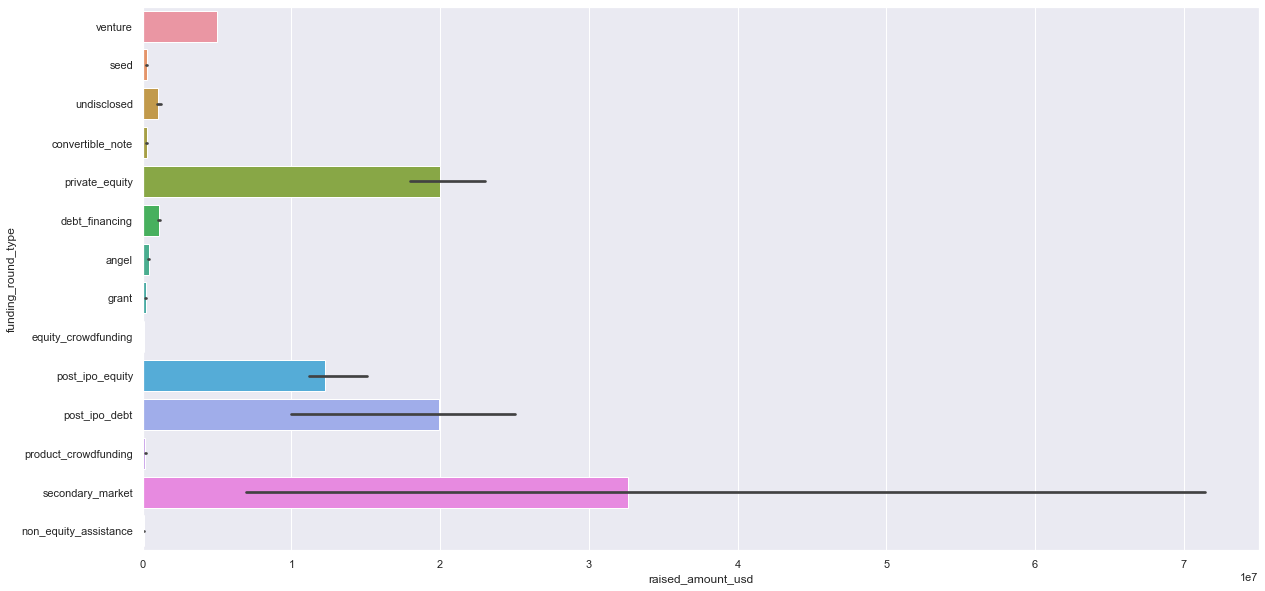

In [2566]:
plt.figure(figsize=[20,10])
sns.barplot(data=master_frame, x="raised_amount_usd", y="funding_round_type", estimator=np.median)
plt.show()

#### As per requirement we need to restrict our analysis for below `funding_round_type`
- venture
- angle
- seed
- private equity

In [2567]:
#Checking shape and info of master_frame
print(master_frame.shape)
print()
master_frame.info()

(94959, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  94959 non-null  object 
 1   funding_round_type       94959 non-null  object 
 2   funded_at                94959 non-null  object 
 3   raised_amount_usd        94959 non-null  float64
 4   permalink                94959 non-null  object 
 5   name                     94958 non-null  object 
 6   category_list            93915 non-null  object 
 7   status                   94959 non-null  object 
 8   country_code             89108 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.7+ MB


__Filtering data and assigning to "master_frame"__

In [2568]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [2569]:
#Checking shape and info of master_frame after filtering
print(master_frame.shape)
print()
master_frame.info()

(80627, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  80627 non-null  object 
 1   funding_round_type       80627 non-null  object 
 2   funded_at                80627 non-null  object 
 3   raised_amount_usd        80627 non-null  float64
 4   permalink                80627 non-null  object 
 5   name                     80626 non-null  object 
 6   category_list            79772 non-null  object 
 7   status                   80627 non-null  object 
 8   country_code             75606 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.2+ MB


In [2570]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
7,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN


In [2571]:
master_frame.describe()

,raised_amount_usd
count,8.062700e+04
mean,9.347995e+06
std,7.562940e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.975496e+06
max,1.760000e+10


In [2572]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

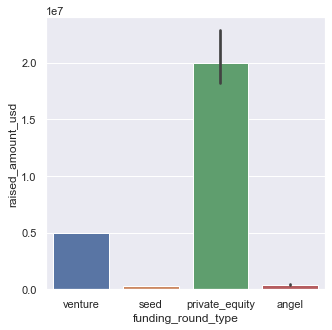

In [2573]:
plt.figure(figsize=[5,5])
sns.barplot(data=master_frame, y="raised_amount_usd", x="funding_round_type", estimator=np.median)
plt.show()

In [2574]:
master_frame.funding_round_type.describe()

count       80627
unique          4
top       venture
freq        50228
Name: funding_round_type, dtype: object

- <font color=blue>__Table -2.1 (Q5): Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?__</font>
    - __Answer__:<font color=maroon> Venture</font>

In [2575]:
#To find out Funding type having median of 5 to 15 million USD per investment round
# Grouping data as per fund rounding type
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

In [2576]:
suitable_invest_type = pd.DataFrame(master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False))

In [2577]:
suitable_invest_type.head()

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,400000.0
seed,275000.0


In [2578]:
# Applying business restrictions and making sure to filter out values not included 
suitable_invest_type = suitable_invest_type.loc[(suitable_invest_type.raised_amount_usd >= 5000000) & 
                                             (suitable_invest_type.raised_amount_usd <= 15000000)]
suitable_invest_type.head()

,raised_amount_usd
funding_round_type,
venture,5000000.0


<font color=maroon>__Based on above results `"venture"` is best investment type suitable for Spark Funds__</font>

========================================================================================================================
# Checkpoint 3. Country Analysis
========================================================================================================================

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the __chosen investment type__)

- For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [2579]:
master_frame.shape

(80627, 9)

In [2580]:
#As chosen investment type is "venture". So first let's get the whole data only for venture
venture_df = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]
venture_df.shape

(50228, 9)

- <font color = blue>__Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)__</font>

In [2581]:
top9 = pd.DataFrame(venture_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)).head(9)
top9.reset_index(inplace=True)
top9.head(9)

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


__Above are the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type "venture")__

In [2582]:
top9.describe()

,raised_amount_usd
count,9.000000e+00
mean,5.893831e+10
std,1.367935e+11
min,3.363677e+09
25%,6.907515e+09
50%,9.583332e+09
75%,2.024563e+10
max,4.225108e+11


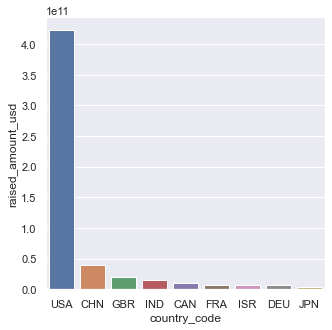

In [2583]:
plt.figure(figsize=[5,5])
sns.barplot(data=top9, x="country_code",y="raised_amount_usd", estimator=np.median)
plt.show()

- <font color = blue>__Table 3.1: Analysing the Top 3 English-Speaking Countries__</font>

Now we have a list to TOP 9 countries where Spark Funds want to venture which have received the highest total funding. 
So now let's try to get top 3 English speaking countries using webscrapping technique on [WikiLink](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language) 

#### Note: Two Points to remember
- We need to find top 3 english speaking country from the list of country code which we filtered as highest funding.
- We need to consider a country to be English speaking only if English is one of the official languages in that country

In [2584]:
from bs4 import BeautifulSoup 
import requests 
URL = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
r = requests.get(URL) 
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries and territories where English is an official language - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e341b8c0-888c-46c0-8e9f-9e0bb8d8aeb3","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_and_territories_where_English_is_an_official_language","wgTitle":"List of countries and territories where English is an official language","wgCurRevisionId":1020094209,"wgRevisionId":1020094209,"wgArticleId":750096,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups"

__Using WebScrapping techinique, it will be tricky to get the expected result so we need to do manual analyse from the link provided in case study.__

__[https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language](https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language)__

**`Based on Manual analysis below are the top 3 English Speaking countries over the globe`**

Along with the link provided in case study below link also helped to identify top 3 english speaking countries easily.

[https://www.mapsofworld.com/answers/language/top-ten-english-speaking-countries/#](https://www.mapsofworld.com/answers/language/top-ten-english-speaking-countries/#)

#### Final outcome after analyzing multiple web link. Below is the top 3 countries
#### Below is the extracted data from those Web Links. Here listing down top 7 english speaking country and after that we will compare both below list and the list which is generate for investement.

__`Rank     Country            Country_code     No. of Eng. speakers     Percentage of Eng. speakers`__

`1.         United States      USA              283,160,411               95.46`<br>
`2.         India              IND              125,344,737               12.18`<br>
`3.         Pakistan	       PAK              108,036,049	           57`      <br>
`4.         Nigeria	        NGA              79,000,000	            53.34`      <br>
`5.         Philippines	    PHL              64,025,890	            63.73`      <br>
`6.         United Kingdom     GBR              59,600,000	            97.74`  <br>
`7.         Germany    	    DEU              45,400,000	            56`         <br>

__Let's prepare a list of above county_code__

In [2585]:
top7_eng_speak_cntry = ['USA','IND','PAK','NGA','PHL','GBR','DEU']

In [2586]:
#Top 3 english speaking countries which is available for funding and investent.
top3_eng_speak_cntry = top9[top9.country_code.isin(top7_eng_speak_cntry)]
top3_eng_speak_cntry.head(3)

,country_code,raised_amount_usd
0,USA,4.225108e+11
2,GBR,2.024563e+10
3,IND,1.439186e+10


### Top 3 English Speaking country 
1. USA - United States of America
2. GBR - United Kingdom
3. IND - India

## <font color=blue>Table -  3.1</font>
		
#### `Analysing the Top 3 English-Speaking Countries`		
`S.No	 Questions	                           Answers`<br>
`1	    Top English speaking country	        USA`   <br>
`2.	   Second English speaking country	     GBR`      <br>
`3.	   Third English speaking country	      IND`      <br>


========================================================================================================================
# Checkpoint 4. Sector Analysis 1
========================================================================================================================

__Business Rule discussed with CEO:__<br>
- First string before the vertical bar (|) will be considered the __primary sector__.
    

#### Approach 
1. **Extract** the primary sector of each category list from the **category_list** column of **"master_frame"**
2. Use the **mapping file** 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [2587]:
venture_df.shape

(50228, 9)

In [2588]:
venture_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  50228 non-null  object 
 1   funding_round_type       50228 non-null  object 
 2   funded_at                50228 non-null  object 
 3   raised_amount_usd        50228 non-null  float64
 4   permalink                50228 non-null  object 
 5   name                     50228 non-null  object 
 6   category_list            49726 non-null  object 
 7   status                   50228 non-null  object 
 8   country_code             48111 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [2589]:
venture_df.reset_index(inplace=True, drop=True)
venture_df.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
1,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
2,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
3,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
4,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


***Creating new column "Primary_Sector" by extracting the data from Category List column***

In [2590]:
#First make all data in same format i.e. in lower case for column "category_list"

venture_df['category_list'] = venture_df['category_list'].str.lower()
venture_df.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND
1,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",apps|games|mobile,operating,NaN
2,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,curated web,operating,CHN
3,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN
4,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,analytics,operating,USA


In [2591]:
#Now split category_list by vertical bar and take First string before the vertical bar as "primary sector".

venture_df['primary_sector'] = venture_df['category_list'].str.split("|").str[0]
venture_df.head(10)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media
1,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",apps|games|mobile,operating,NaN,apps
2,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,curated web,operating,CHN,curated web
3,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN,biotechnology
4,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,analytics,operating,USA,analytics
5,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,analytics,operating,USA,analytics
6,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,analytics,operating,USA,analytics
7,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,apps|cable|distribution|software,acquired,USA,apps
8,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,education,operating,GBR,education
9,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,curated web,acquired,USA,curated web


In [2592]:
venture_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  50228 non-null  object 
 1   funding_round_type       50228 non-null  object 
 2   funded_at                50228 non-null  object 
 3   raised_amount_usd        50228 non-null  float64
 4   permalink                50228 non-null  object 
 5   name                     50228 non-null  object 
 6   category_list            49726 non-null  object 
 7   status                   50228 non-null  object 
 8   country_code             48111 non-null  object 
 9   primary_sector           49726 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [2593]:
venture_df.groupby('primary_sector').count()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
primary_sector,,,,,,,,,
3d,80,80,80,80,80,80,80,80,74
3d printing,26,26,26,26,26,26,26,26,26
3d technology,12,12,12,12,12,12,12,12,11
accounting,107,107,107,107,107,107,107,107,106
active lifestyle,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...
web hosting,510,510,510,510,510,510,510,510,493
web tools,1,1,1,1,1,1,1,1,1
wine and spirits,5,5,5,5,5,5,5,5,5


In [2594]:
# Now load mapping.csv in DataFrames as "sector_mapping"
# Added "ISO-8859-1" to avoid any encoding issues
sector_mapping=pd.read_csv("./mapping.csv", encoding = "ISO-8859-1")

In [2595]:
#To avoid any special character issue in data need to handle it using below
sector_mapping.category_list = sector_mapping.category_list.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

#### Initial analysis on DataFrames

In [2596]:
#Check the shape of both dataframes
print("No. of Rows and Columns in sector_mapping DataFrame:", sector_mapping.shape)

No. of Rows and Columns in sector_mapping DataFrame: (688, 10)


In [2597]:
#Check Metadata using info() of both DataFrame
print("Metadata of sector_mapping DataFrame:\n")
sector_mapping.info()

Metadata of sector_mapping DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)


In [2598]:
#Display the data of companies
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [2599]:
#Describe the data of sector_mapping
sector_mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2600]:
#Convert "category_list" to lower case to make all links in same format 
#"dropna" Exclude NULL value if True
#nunique is used to get unique values in "category_list" column
sector_mapping['category_list'] = sector_mapping['category_list'].str.lower()
sector_mapping['category_list'].nunique(dropna = True)

687

In [2601]:
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1


**Using 'melt' function, transpose the column names into main_sector column with values 0 and 1 [https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.melt.html](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.melt.html)**

In [2602]:
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="main_sector")
sector_mapping.head(10)

,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3d,Automotive & Sports,0
2,3d printing,Automotive & Sports,0
3,3d technology,Automotive & Sports,0
4,accounting,Automotive & Sports,0
5,active lifestyle,Automotive & Sports,0
6,ad targeting,Automotive & Sports,0
7,advanced materials,Automotive & Sports,0
8,adventure travel,Automotive & Sports,1
9,advertising,Automotive & Sports,0


In [2603]:
#Now let's collect only those whose value is "1"
(sector_mapping['value'] == 1).value_counts()

False    5504
True      688
Name: value, dtype: int64

In [2604]:
#Prepare a dataframe based on main sector and its category only
sector_mapping[(sector_mapping['value'] == 1)]

,category_list,main_sector,value
8,adventure travel,Automotive & Sports,1
14,aerospace,Automotive & Sports,1
45,auto,Automotive & Sports,1
46,automated kiosk,Automotive & Sports,1
47,automotive,Automotive & Sports,1
...,...,...,...
6121,social recruiting,"Social, Finance, Analytics, Advertising",1
6122,social television,"Social, Finance, Analytics, Advertising",1
6123,social travel,"Social, Finance, Analytics, Advertising",1
6134,stock exchanges,"Social, Finance, Analytics, Advertising",1


In [2605]:
#Now let's assign above data again to "secort_mapping" dataframe
sector_mapping = sector_mapping[(sector_mapping['value'] == 1)]

In [2606]:
sector_mapping.shape

(688, 3)

In [2607]:
#Verfication of sector_mapping dataframe.
sector_mapping[(sector_mapping['value'] != 1)]

,category_list,main_sector,value


Based on above result all data is correct in sector_mapping 

In [2608]:
#Now Let's remove column "value" as it is not required now
sector_mapping = sector_mapping.drop(columns="value")
sector_mapping.head()

,category_list,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [2609]:
sector_mapping.reset_index(inplace=True,drop=True)
print(sector_mapping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    688 non-null    object
dtypes: object(2)
memory usage: 10.9+ KB
None


In [2610]:
sector_mapping.category_list.isna().value_counts()

False    687
True       1
Name: category_list, dtype: int64

**Data Analysed in excel provided for mapping**
- There are some data in column "category_list" of "sector_mapping" dataframe whose "na" is replaced by "0". So based on analysis need to replace "0" with "na". 

Example:<br>
#### `Wrong Text                   Correct Text`
`0notechnology                nanotechnology`<br>
`0vigation                    navigation`<br>




Refer below cell for more details.

In [2611]:
sector_mapping.category_list.sort_values(ascending=True)

62                  0notechnology
63     0tural language processing
64               0tural resources
320                     0vigation
228                            3d
                  ...            
163              wine and spirits
164                      wireless
533                         women
534                  young adults
22                            NaN
Name: category_list, Length: 688, dtype: object

In [2612]:
sector_mapping['category_list'] = sector_mapping['category_list'].str.replace("0","na")

In [2613]:
sector_mapping.category_list.sort_values(ascending=True).head(n=475)

228                             3d
229                    3d printing
230                  3d technology
535                     accounting
165               active lifestyle
                  ...             
62                  nanotechnology
63     natural language processing
64               natural resources
320                     navigation
441               network security
Name: category_list, Length: 475, dtype: object

In [2614]:
sector_mapping.shape

(688, 2)

In [2615]:
sector_mapping[sector_mapping['category_list'].str.contains("2.") == True]

,category_list,main_sector
361,enterprise 2.na,Others
413,k-12 education,Others
434,m2m,Others
547,b2b,"Social, Finance, Analytics, Advertising"
548,b2b express delivery,"Social, Finance, Analytics, Advertising"
653,p2p money transfer,"Social, Finance, Analytics, Advertising"


In [2616]:
sector_mapping['category_list'] = sector_mapping['category_list'].str.replace("2.na","2.0")

In [2617]:
sector_mapping[sector_mapping['category_list'].str.contains("2.") == True]

,category_list,main_sector
361,enterprise 2.0,Others
413,k-12 education,Others
434,m2m,Others
547,b2b,"Social, Finance, Analytics, Advertising"
548,b2b express delivery,"Social, Finance, Analytics, Advertising"
653,p2p money transfer,"Social, Finance, Analytics, Advertising"


In [2618]:
sector_mapping.tail()

,category_list,main_sector
683,social recruiting,"Social, Finance, Analytics, Advertising"
684,social television,"Social, Finance, Analytics, Advertising"
685,social travel,"Social, Finance, Analytics, Advertising"
686,stock exchanges,"Social, Finance, Analytics, Advertising"
687,venture capital,"Social, Finance, Analytics, Advertising"


In [2619]:
sector_mapping.isnull().value_counts()

category_list  main_sector
False          False          687
True           False            1
dtype: int64

Let's now merge `"venture_df"` and `"sector_mapping"` dataframes and get combined result

In [2620]:
venture_df.primary_sector.isnull().value_counts()

False    49726
True       502
Name: primary_sector, dtype: int64

In [2621]:
venture_sector_map_frame = pd.merge(venture_df,sector_mapping,how='inner',left_on='primary_sector',right_on='category_list')
print(venture_sector_map_frame.shape)
venture_sector_map_frame.head()

(50214, 12)


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media,media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,media,operating,USA,media,media,Entertainment


**Data in Column "primary_sector" and category_list_y" looks same. Let's verify the same and based on that drop "category_list_y"**

In [2622]:
#Using set()
set(venture_sector_map_frame.primary_sector).difference(set(venture_sector_map_frame.category_list_y))

set()

__As above is no values that means both the columns are having same data. Let re-verify with 2nd method as well__

In [2623]:
#Using isin()
venture_sector_map_frame.primary_sector.isin(venture_sector_map_frame.category_list_y).value_counts()

True    50214
Name: primary_sector, dtype: int64

__As above is showing "True" for all 50207 rows. This means that both columns having same data.__

<font color=maroon>So the conclusion is that we should drop any one column. Let's drop duplicate column __"category_list_y"__</font>

In [2624]:
venture_sector_map_frame.drop(columns="category_list_y",inplace=True)

In [2625]:
venture_sector_map_frame.shape

(50214, 11)

In [2626]:
venture_sector_map_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,Entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,media,operating,USA,media,Entertainment


In [2627]:
venture_sector_map_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  50214 non-null  object 
 1   funding_round_type       50214 non-null  object 
 2   funded_at                50214 non-null  object 
 3   raised_amount_usd        50214 non-null  float64
 4   permalink                50214 non-null  object 
 5   name                     50214 non-null  object 
 6   category_list_x          49712 non-null  object 
 7   status                   50214 non-null  object 
 8   country_code             48098 non-null  object 
 9   primary_sector           49712 non-null  object 
 10  main_sector              50214 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [2628]:
venture_sector_map_frame.describe()

,raised_amount_usd
count,5.021400e+04
mean,1.174656e+07
std,8.635976e+07
min,0.000000e+00
25%,1.602816e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [2629]:
#Let's make country_code in upper case and main_sector column data in lower case
venture_sector_map_frame['country_code'] = venture_sector_map_frame['country_code'].str.upper()
venture_sector_map_frame['main_sector'] = venture_sector_map_frame['main_sector'].str.lower()

In [2630]:
venture_sector_map_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media,entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,media,operating,USA,media,entertainment


In [2631]:
venture_sector_map_frame.shape

(50214, 11)

In [2632]:
venture_sector_map_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  50214 non-null  object 
 1   funding_round_type       50214 non-null  object 
 2   funded_at                50214 non-null  object 
 3   raised_amount_usd        50214 non-null  float64
 4   permalink                50214 non-null  object 
 5   name                     50214 non-null  object 
 6   category_list_x          49712 non-null  object 
 7   status                   50214 non-null  object 
 8   country_code             48098 non-null  object 
 9   primary_sector           49712 non-null  object 
 10  main_sector              50214 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.6+ MB


In [2633]:
venture_sector_map_frame.groupby('status').count()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,country_code,primary_sector,main_sector
status,,,,,,,,,,
acquired,7543,7543,7543,7543,7543,7543,7527,7341,7527,7543
closed,3582,3582,3582,3582,3582,3582,3366,3158,3366,3582
ipo,2460,2460,2460,2460,2460,2460,2459,2424,2459,2460
operating,36629,36629,36629,36629,36629,36629,36360,35175,36360,36629


In [2634]:
#venture_sector_map_frame.funding_round_permalink.isna().sample(5)
#Check how many records is is having country_code as NULL
venture_sector_map_frame.country_code.isnull().value_counts()

False    48098
True      2116
Name: country_code, dtype: int64

In [2635]:
#Based on above we can remove all who don't have any country_code because by imputing it will give fault analysis.
print(venture_sector_map_frame.shape)
venture_sector_map_frame = venture_sector_map_frame[~venture_sector_map_frame.country_code.isnull()]

(50214, 11)


In [2636]:
round(100*(venture_sector_map_frame.isnull().sum()/len(venture_sector_map_frame.index)), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list_x            0.63
status                     0.00
country_code               0.00
primary_sector             0.63
main_sector                0.00
dtype: float64

In [2637]:
venture_sector_map_frame.shape

(48098, 11)

In [2638]:
venture_sector_map_frame[venture_sector_map_frame.primary_sector.isnull()].count()

funding_round_permalink    302
funding_round_type         302
funded_at                  302
raised_amount_usd          302
permalink                  302
name                       302
category_list_x              0
status                     302
country_code               302
primary_sector               0
main_sector                302
dtype: int64

In [2639]:
#Based on above we can remove all who don't have any primary_sector and because by imputing it will give fault analysis.
print(venture_sector_map_frame.shape)
venture_sector_map_frame = venture_sector_map_frame[~venture_sector_map_frame.primary_sector.isnull()]

(48098, 11)


In [2640]:
round(100*(venture_sector_map_frame.isnull().sum()/len(venture_sector_map_frame.index)), 2)

funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list_x            0.0
status                     0.0
country_code               0.0
primary_sector             0.0
main_sector                0.0
dtype: float64

In [2641]:
venture_sector_map_frame.shape

(47796, 11)

========================================================================================================================
# Checkpoint 5: Sector Analysis 2
========================================================================================================================

##### Based on the requirement given and data analysis we have below brief results on which we can provide further analysis.

- Funding Type (FT): "Venture"
- Country 1 (C1): USA
- Country 2 (C2): GBR
- Country 3 (C3): IND
- Range of funding: 5 to 15 million USD

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of 
funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the 
master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total 
number of investments and the total amount of investments in each main sector for each of the three countries.

 

In [2642]:
venture_sector_map_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47796 entries, 0 to 50213
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  47796 non-null  object 
 1   funding_round_type       47796 non-null  object 
 2   funded_at                47796 non-null  object 
 3   raised_amount_usd        47796 non-null  float64
 4   permalink                47796 non-null  object 
 5   name                     47796 non-null  object 
 6   category_list_x          47796 non-null  object 
 7   status                   47796 non-null  object 
 8   country_code             47796 non-null  object 
 9   primary_sector           47796 non-null  object 
 10  main_sector              47796 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.4+ MB


In [2643]:
venture_sector_map_frame.reset_index(inplace=True,drop=True)

In [2644]:
venture_sector_map_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47796 entries, 0 to 47795
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  47796 non-null  object 
 1   funding_round_type       47796 non-null  object 
 2   funded_at                47796 non-null  object 
 3   raised_amount_usd        47796 non-null  float64
 4   permalink                47796 non-null  object 
 5   name                     47796 non-null  object 
 6   category_list_x          47796 non-null  object 
 7   status                   47796 non-null  object 
 8   country_code             47796 non-null  object 
 9   primary_sector           47796 non-null  object 
 10  main_sector              47796 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.0+ MB


In [2645]:
venture_sector_map_frame.rename(columns={"category_list_x": "category_list"})

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media,entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,media,operating,USA,media,entertainment
...,...,...,...,...,...,...,...,...,...,...,...
47791,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,/organization/yapta,Yapta,tracking|transportation|travel,operating,USA,tracking,others
47792,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,/organization/yapta,Yapta,tracking|transportation|travel,operating,USA,tracking,others
47793,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,01-07-2007,7227332.0,/organization/yunnan-landsun-green-industry-gr...,Yunnan Landsun Green Industry (Group),tea,operating,CHN,tea,others
47794,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,/organization/ziftit,Ziftit,gift registries|shopping,closed,USA,gift registries,others


In [2646]:
#As D1 is assigned to USA (United States of America) DataFrame
D1 = venture_sector_map_frame[(venture_sector_map_frame['country_code'] == 'USA') & 
             ((venture_sector_map_frame['raised_amount_usd'] >= 5000000.0) & 
             (venture_sector_map_frame['raised_amount_usd'] <= 15000000.0))]

In [2647]:
#Top3 sector of Total Investment Count for USA
D1_tot_cnt_invst = pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().
                     rename('total_investment_count').sort_values(ascending = False))
D1_tot_cnt_invst.head(3)

,total_investment_count
main_sector,
others,2950
"social, finance, analytics, advertising",2714
cleantech / semiconductors,2350


In [2648]:
D1.reset_index(inplace=True, drop=True)
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12063 entries, 0 to 12062
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  12063 non-null  object 
 1   funding_round_type       12063 non-null  object 
 2   funded_at                12063 non-null  object 
 3   raised_amount_usd        12063 non-null  float64
 4   permalink                12063 non-null  object 
 5   name                     12063 non-null  object 
 6   category_list_x          12063 non-null  object 
 7   status                   12063 non-null  object 
 8   country_code             12063 non-null  object 
 9   primary_sector           12063 non-null  object 
 10  main_sector              12063 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.0+ MB


In [2649]:
D1.shape

(12063, 11)

In [2650]:
D1.describe()

,raised_amount_usd
count,1.206300e+04
mean,8.932861e+06
std,3.075861e+06
min,5.000000e+06
25%,6.000970e+06
50%,8.300000e+06
75%,1.100000e+07
max,1.500000e+07


In [2651]:
D1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,media,operating,USA,media,entertainment
1,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,media|mobile|restaurants|technology,operating,USA,media,entertainment
2,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,media|news|publishing,acquired,USA,media,entertainment
3,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,media|news|publishing,acquired,USA,media,entertainment
4,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,/organization/matchmine,MatchMine,media|news|reviews and recommendations,closed,USA,media,entertainment


In [2652]:
#As D2 is assigned to Great Britain (United Kingdom) (GBR) DataFrame
D2 = venture_sector_map_frame[((venture_sector_map_frame['country_code'] == 'GBR') & 
             ((venture_sector_map_frame['raised_amount_usd'] >= 5000000.0) & 
             (venture_sector_map_frame['raised_amount_usd'] <= 15000000.0)))]

In [2653]:
#Top3 sector of Total Investment Count for GBR
D2_tot_cnt_invst = pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().
                     rename('total_investment_count').sort_values(ascending = False))
D2_tot_cnt_invst.head(3)

,total_investment_count
main_sector,
others,147
"social, finance, analytics, advertising",133
cleantech / semiconductors,130


In [2654]:
D2.reset_index(inplace=True, drop=True)
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  621 non-null    object 
 1   funding_round_type       621 non-null    object 
 2   funded_at                621 non-null    object 
 3   raised_amount_usd        621 non-null    float64
 4   permalink                621 non-null    object 
 5   name                     621 non-null    object 
 6   category_list_x          621 non-null    object 
 7   status                   621 non-null    object 
 8   country_code             621 non-null    object 
 9   primary_sector           621 non-null    object 
 10  main_sector              621 non-null    object 
dtypes: float64(1), object(10)
memory usage: 53.5+ KB


In [2655]:
D2.shape

(621, 11)

In [2656]:
D2.describe()

,raised_amount_usd
count,6.210000e+02
mean,8.661962e+06
std,2.867167e+06
min,5.000000e+06
25%,6.084330e+06
50%,8.000000e+06
75%,1.060676e+07
max,1.500000e+07


In [2657]:
D2.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
1,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,operating,GBR,media,entertainment
2,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,16-07-2015,10700000.0,/organization/flypay,Flypay,apps|customer service|restaurants,operating,GBR,apps,"news, search and messaging"
3,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,17-04-2013,15000000.0,/organization/kaazing,Kaazing,apps|data integration|enterprise software|info...,operating,GBR,apps,"news, search and messaging"
4,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,01-11-2011,5000000.0,/organization/mindshapes,Mindshapes,apps|education|games|kids|textbooks|virtual wo...,operating,GBR,apps,"news, search and messaging"


In [2658]:
#As D3 is assigned to IND (India) DataFrame
D3 = venture_sector_map_frame[(venture_sector_map_frame['country_code'] == 'IND') & 
             (venture_sector_map_frame['raised_amount_usd'] >= 5000000.0) & 
             (venture_sector_map_frame['raised_amount_usd'] <= 15000000.0)]

In [2659]:
#Top3 sector of Total Investment Count for IND
D3_tot_cnt_invst = pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().
                     rename('total_investment_count').sort_values(ascending = False))
D3_tot_cnt_invst.head(3)

,total_investment_count
main_sector,
others,110
"social, finance, analytics, advertising",60
"news, search and messaging",52


In [2660]:
D3.reset_index(inplace=True, drop=True)
D3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  328 non-null    object 
 1   funding_round_type       328 non-null    object 
 2   funded_at                328 non-null    object 
 3   raised_amount_usd        328 non-null    float64
 4   permalink                328 non-null    object 
 5   name                     328 non-null    object 
 6   category_list_x          328 non-null    object 
 7   status                   328 non-null    object 
 8   country_code             328 non-null    object 
 9   primary_sector           328 non-null    object 
 10  main_sector              328 non-null    object 
dtypes: float64(1), object(10)
memory usage: 28.3+ KB


In [2661]:
D3.shape

(328, 11)

In [2662]:
D3.describe()

,raised_amount_usd
count,3.280000e+02
mean,8.992511e+06
std,3.219811e+06
min,5.000000e+06
25%,6.000000e+06
50%,8.700000e+06
75%,1.055500e+07
max,1.500000e+07


In [2663]:
D3.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,media,operating,IND,media,entertainment
1,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02-10-2015,6000000.0,/organization/chillr-2,Chillr,apps|banking|mobile payments,operating,IND,apps,"news, search and messaging"
2,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,05-06-2015,5000000.0,/organization/jugnoo,JUGNOO,apps|social business|software,operating,IND,apps,"news, search and messaging"
3,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,14-04-2015,10000000.0,/organization/peppertap,PepperTap,apps|groceries|online shopping,operating,IND,apps,"news, search and messaging"
4,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,30-10-2015,7665775.0,/organization/tinyowl-technology,TinyOwl Technology,apps|mobile|specialty foods,operating,IND,apps,"news, search and messaging"


- <font color = blue>**Table -5.1 (Q1): Total number of Investments (count) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>12063</font>__

In [2664]:
print("Total number of investments for USA - United States of America (C1) : " + str(D1.raised_amount_usd.count()))

Total number of investments for USA - United States of America (C1) : 12063


- <font color = blue>**Table -5.1 (Q1): Total number of Investments (count) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>621</font>__

In [2665]:
print("Total number of investments for GBR - United Kingdom (C2) : " + str(D2.raised_amount_usd.count()))

Total number of investments for GBR - United Kingdom (C2) : 621


- <font color = blue>**Table -5.1 (Q1): Total number of Investments (count) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>328</font>__

In [2666]:
print("Total number of investments for IND - India (C3) : " + str(D3.raised_amount_usd.count()))

Total number of investments for IND - India (C3) : 328


- <font color = blue>**Table -5.1 (Q2): Total amount of investment (USD) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>107757097294.0</font>__

In [2667]:
print("Total amount of investment (USD) for USA - United States of America (C1) : " + str(D1.raised_amount_usd.sum()))

Total amount of investment (USD) for USA - United States of America (C1) : 107757097294.0


- <font color = blue>**Table -5.1 (Q2): Total amount of investment (USD) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>5379078691.0</font>__

In [2668]:
print("Total amount of investment (USD) for GBR - United Kingdom (C2) : " + str(D2.raised_amount_usd.sum()))

Total amount of investment (USD) for GBR - United Kingdom (C2) : 5379078691.0


- <font color = blue>**Table -5.1 (Q2): Total amount of investment (USD) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>2949543602.0</font>__

In [2669]:
print("Total amount of investment (USD) for IND - India (C3) : " + str(D3.raised_amount_usd.sum()))

Total amount of investment (USD) for IND - India (C3) : 2949543602.0


- <font color = blue>**Table -5.1 (Q3): Top Sector name (no. of investment-wise) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>others</font>__
    
- <font color = blue>**Table -5.1 (Q4): Second Sector name (no. of investment-wise) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>Social, Finance, Analytics, Advertising</font>__
    
- <font color = blue>**Table -5.1 (Q5): Third Sector name (no. of investment-wise) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>Cleantech / Semiconductors</font>__
    
- <font color = blue>**Table -5.1 (Q6): Number of investments in top sector (3) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>2950</font>__
    
- <font color = blue>**Table -5.1 (Q7): Number of investments in second sector (4) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>2714</font>__
    
- <font color = blue>**Table -5.1 (Q8): Number of investments in third sector (5) for USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>2350</font>__
    
Above answer is based on below analysis

In [2670]:
#Sorting the sector names (no. of investments wise) in descending order:
print(D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False))
print()
print("Top Sector name (no. of investment-wise) for USA - United States of America (C1) : " + "others")
print("Second Sector name (no. of investment-wise) for USA - United States of America (C1) : " + "Social, Finance, Analytics, Advertising")
print("Third Sector name (no. of investment-wise) for USA - United States of America (C1) : " + "cleantech / semiconductors")
print("Number of investments in top sector (3) for USA - United States of America (C1) : " + "2950")
print("Number of investments in second sector (4) for USA - United States of America (C1) : " + "2714")
print("Number of investments in third sector (5) for USA - United States of America (C1) : " + "2350")

main_sector
others                                     2950
social, finance, analytics, advertising    2714
cleantech / semiconductors                 2350
news, search and messaging                 1583
health                                      909
manufacturing                               799
entertainment                               591
automotive & sports                         167
Name: raised_amount_usd, dtype: int64

Top Sector name (no. of investment-wise) for USA - United States of America (C1) : others
Second Sector name (no. of investment-wise) for USA - United States of America (C1) : Social, Finance, Analytics, Advertising
Third Sector name (no. of investment-wise) for USA - United States of America (C1) : cleantech / semiconductors
Number of investments in top sector (3) for USA - United States of America (C1) : 2950
Number of investments in second sector (4) for USA - United States of America (C1) : 2714
Number of investments in third sector (5) for USA - United S

- <font color = blue>**Table -5.1 (Q3): Top Sector name (no. of investment-wise) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>others</font>__
    
- <font color = blue>**Table -5.1 (Q4): Second Sector name (no. of investment-wise) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>social, finance, analytics, advertising</font>__
    
- <font color = blue>**Table -5.1 (Q5): Third Sector name (no. of investment-wise) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>cleantech / semiconductors</font>__
    
- <font color = blue>**Table -5.1 (Q6): Number of investments in top sector (3) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>147</font>__
    
- <font color = blue>**Table -5.1 (Q7): Number of investments in second sector (4) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>133</font>__
    
- <font color = blue>**Table -5.1 (Q8): Number of investments in third sector (5) for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>130</font>__
    
Above answer is based on below analysis

In [2671]:
#Sorting the sector names (no. of investments wise) in descending order:
print(D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False))
print()
print("Top Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : " + "others")
print("Second Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : " + "social, finance, analytics, advertising")
print("Third Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : " + "cleantech / semiconductors")
print("Number of investments in top sector (3) for GBR - United Kingdom (C2) : " + "147")
print("Number of investments in second sector (4) for GBR - United Kingdom (C2) : " + "133")
print("Number of investments in third sector (5) for GBR - United Kingdom (C2) : " + "130")

main_sector
others                                     147
social, finance, analytics, advertising    133
cleantech / semiconductors                 130
news, search and messaging                  73
entertainment                               56
manufacturing                               42
health                                      24
automotive & sports                         16
Name: raised_amount_usd, dtype: int64

Top Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : others
Second Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : social, finance, analytics, advertising
Third Sector name (no. of investment-wise) for GBR - United Kingdom (C2) : cleantech / semiconductors
Number of investments in top sector (3) for GBR - United Kingdom (C2) : 147
Number of investments in second sector (4) for GBR - United Kingdom (C2) : 133
Number of investments in third sector (5) for GBR - United Kingdom (C2) : 130


- <font color = blue>**Table -5.1 (Q3): Top Sector name (no. of investment-wise) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>others</font>__
    
- <font color = blue>**Table -5.1 (Q4): Second Sector name (no. of investment-wise) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>social, finance, analytics, advertising</font>__
    
- <font color = blue>**Table -5.1 (Q5): Third Sector name (no. of investment-wise) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>news, search and messaging</font>__
    
- <font color = blue>**Table -5.1 (Q6): Number of investments in top sector (3) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>110</font>__
    
- <font color = blue>**Table -5.1 (Q7): Number of investments in second sector (4) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>60</font>__
    
- <font color = blue>**Table -5.1 (Q8): Number of investments in third sector (5) for IND - India (C3)?**</font><br>
    __Answer: <font color=maroon>52</font>__
    
Above answer is based on below analysis

In [2672]:
#Sorting the sector names (no. of investments wise) in descending order:
print(D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False))
print()
print("Top Sector name (no. of investment-wise) for IND - India (C3) : " + "others")
print("Second Sector name (no. of investment-wise) for IND - India (C3) : " + "social, finance, analytics, advertising")
print("Third Sector name (no. of investment-wise) for IND - India (C3) : " + "news, search and messaging")
print("Number of investments in top sector (3) for IND - India (C3) : " + "110")
print("Number of investments in second sector (4) for IND - India (C3) : " + "60")
print("Number of investments in third sector (5) for IND - India (C3) : " + "52")

main_sector
others                                     110
social, finance, analytics, advertising     60
news, search and messaging                  52
entertainment                               33
manufacturing                               21
cleantech / semiconductors                  20
health                                      19
automotive & sports                         13
Name: raised_amount_usd, dtype: int64

Top Sector name (no. of investment-wise) for IND - India (C3) : others
Second Sector name (no. of investment-wise) for IND - India (C3) : social, finance, analytics, advertising
Third Sector name (no. of investment-wise) for IND - India (C3) : news, search and messaging
Number of investments in top sector (3) for IND - India (C3) : 110
Number of investments in second sector (4) for IND - India (C3) : 60
Number of investments in third sector (5) for IND - India (C3) : 52


- <font color = blue>**Table -5.1 (Q9): For point 3 (top sector count-wise), which company received the highest investment for  USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>/organization/virtustream</font>__

Above answer is based on below analysis

In [2673]:
#Finding top 3 companies in terms of investment amount in the "others" sector 
D1[D1['main_sector'] == "others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/virtustream          64300000.0
/organization/capella              54968051.0
/organization/airtight-networks    54201907.0
Name: raised_amount_usd, dtype: float64

- <font color = blue>**Table -5.1 (Q10): For point 4 (second best sector count-wise), which company received the highest investment for  USA - United States of America (C1)?**</font><br>
    __Answer: <font color=maroon>/organization/shotspotter</font>__
    
Above answer is based on below analysis

In [2674]:
#Finding top 3 companies in terms of investment amount in the "social, finance, analytics, advertising" sector 
D1[D1['main_sector'] == "social, finance, analytics, advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
Name: raised_amount_usd, dtype: float64

- <font color = blue>**Table -5.1 (Q9): For point 3 (top sector count-wise), which company received the highest investment for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>/organization/electric-cloud</font>__
    
Above answer is based on below analysis

In [2675]:
#Finding top 3 companies in terms of investment amount in the "others" sector 
D2[D2['main_sector'] == "others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/electric-cloud    37000000.0
/organization/sensage           36250000.0
/organization/enigmatic         32500000.0
Name: raised_amount_usd, dtype: float64

- <font color = blue>**Table -5.1 (Q10): For point 4 (second best sector count-wise), which company received the highest investment for GBR - United Kingdom (C2)?**</font><br>
    __Answer: <font color=maroon>/organization/celltick-technologies</font>__
    
Above answer is based on below analysis

In [2676]:
#Finding top 3 companies in terms of investment amount in the "social, finance, analytics, advertising" sector 
D2[D2['main_sector'] == "social, finance, analytics, advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
Name: raised_amount_usd, dtype: float64

- <font color = blue>**Table -5.1 (Q9): For point 3 (top sector count-wise), which company received the highest investment for IND - India?**</font><br>
    __Answer: <font color=maroon>/organization/firstcry-com</font>__
    
Above answer is based on below analysis

In [2677]:
#Finding top 3 companies in terms of investment amount in the "others" sector 
D3[D3['main_sector'] == "others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/firstcry-com    39000000.0
/organization/myntra          38000000.0
/organization/commonfloor     32900000.0
Name: raised_amount_usd, dtype: float64

- <font color = blue>**Table -5.1 (Q10): For point 4 (second best sector count-wise), which company received the highest investment for IND - India?**</font><br>
    __Answer: <font color=maroon>/organization/manthan-systems</font>__
    
Above answer is based on below analysis

In [2678]:
#Finding top 3 companies in terms of investment amount in the "social, finance, analytics, advertising" sector 
D3[D3['main_sector'] == "social, finance, analytics, advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/manthan-systems    50700000.0
/organization/komli-media        28000000.0
/organization/shopclues-com      25000000.0
Name: raised_amount_usd, dtype: float64

========================================================================================================================
# Checkpoint 6: Plots
========================================================================================================================

CEO of Spark Funds wants to see the following plots:
1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                  
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

# Plot 1:

- **<font color=blue>Plot 1: A plot showing `the representative amount of investment` in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.</font>**

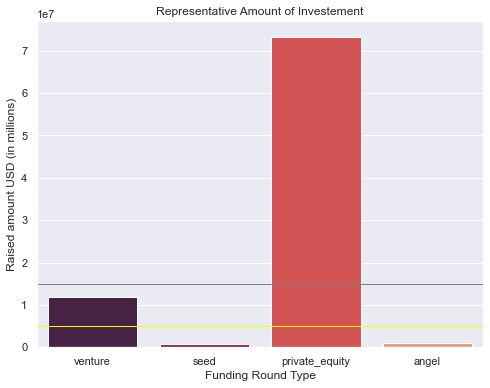

In [2679]:
plt.figure(figsize=[8,6])
sns.set_theme(style="darkgrid")
sns.barplot(data=master_frame, y="raised_amount_usd", x="funding_round_type", estimator=np.mean, ci=None,palette = "rocket")
plt.ylabel("Raised amount USD (in millions)")
plt.xlabel("Funding Round Type")
plt.title("Representative Amount of Investement") 
plt.axhline(y=5000000, linewidth=1, color = 'yellow')
plt.axhline(y=15000000, linewidth=1, color = 'gray')
plt.show()

# Plot 2:

- **<font color=blue>Plot 2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.</font>**

Steps followed:

1. Created a new DataFrame with Country code and English Speaking Flag as per wiki page provided for top 9 countries
2. Merge top9 and eng_speak_cntry_lst DataFrames
3. Used a bar plot graph to show Total Investment Amount (Y-Axis) for Top 9 Countries (X-Axis) with hue as English Speaking Country Flag

In [2680]:
top9.head(10)

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


In [2681]:
#To make chart with better clarification. We need to create a dataframe which should tell which of the 3 English speaking countries USA, GBR, IND are with highest investment

eng_speak_cntry_lst = pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'english_speaking': ['Y','N','Y','Y','Y','N','Y','Y','N']})
eng_speak_cntry_lst.head(10)

,country_code,english_speaking
0,USA,Y
1,CHN,N
2,GBR,Y
3,IND,Y
4,CAN,Y
5,FRA,N
6,ISR,Y
7,DEU,Y
8,JPN,N


In [2682]:
top9.head(10)

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


In [2683]:
top9=pd.merge(top9,eng_speak_cntry_lst, how='inner', on='country_code')
top9.head(n=10)

,country_code,raised_amount_usd,english_speaking
0,USA,4.225108e+11,Y
1,CHN,3.983542e+10,N
2,GBR,2.024563e+10,Y
3,IND,1.439186e+10,Y
4,CAN,9.583332e+09,Y
5,FRA,7.259537e+09,N
6,ISR,6.907515e+09,Y
7,DEU,6.346960e+09,Y
8,JPN,3.363677e+09,N


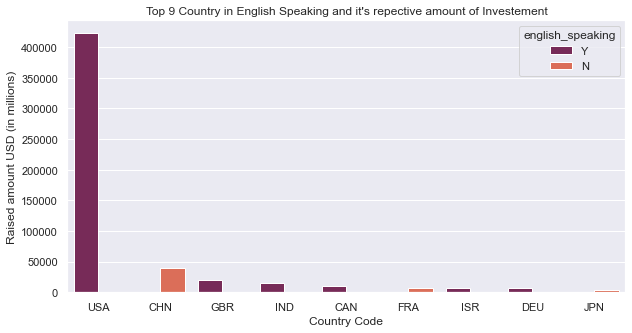

In [2684]:
plt.figure(figsize=[10,5])
sns.barplot(data=top9, x="country_code",y=top9['raised_amount_usd']/1000000, hue=top9['english_speaking'], palette = "rocket")
plt.ylabel("Raised amount USD (in millions)")
plt.xlabel("Country Code")
plt.title("Top 9 Country in English Speaking and it's repective amount of Investement") 
plt.show()

# Plot 3

- **<font color=blue>Plot 3: A plot showing the number of investments in the `top 3 sectors` of the `top 3 countries` on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.</font>**

Let's start plotting country by country and then merge all together into one graph.

#### USA - United States of America

In [2685]:
D1_tot_cnt_invst = D1_tot_cnt_invst.sort_values(by='total_investment_count',ascending = False).head(n=3)
D1_tot_cnt_invst['country_code'] = "USA"

In [2686]:
D1_tot_cnt_invst.reset_index(inplace=True)
D1_tot_cnt_invst.head()

,main_sector,total_investment_count,country_code
0,others,2950,USA
1,"social, finance, analytics, advertising",2714,USA
2,cleantech / semiconductors,2350,USA


#### GBR - United Kingdom (Great Britain)

In [2687]:
D2_tot_cnt_invst = D2_tot_cnt_invst.sort_values(by='total_investment_count',ascending = False).head(n=3)
D2_tot_cnt_invst['country_code'] = "GBR"

In [2688]:
D2_tot_cnt_invst.reset_index(inplace=True)
D2_tot_cnt_invst.head()

,main_sector,total_investment_count,country_code
0,others,147,GBR
1,"social, finance, analytics, advertising",133,GBR
2,cleantech / semiconductors,130,GBR


#### IND - India

In [2689]:
D3_tot_cnt_invst = D3_tot_cnt_invst.sort_values(by='total_investment_count',ascending = False).head(n=3)
D3_tot_cnt_invst['country_code'] = "IND"

In [2690]:
D3_tot_cnt_invst.reset_index(inplace=True)
D3_tot_cnt_invst.head()

,main_sector,total_investment_count,country_code
0,others,110,IND
1,"social, finance, analytics, advertising",60,IND
2,"news, search and messaging",52,IND


**Now let's merge all above `top 3 countries` for `top 3 sectors`**

In [2691]:
tot_cnt_invst=pd.merge(pd.merge(D1_tot_cnt_invst,D2_tot_cnt_invst,how='outer'),D3_tot_cnt_invst,how='outer')
tot_cnt_invst.head(n=10)

,main_sector,total_investment_count,country_code
0,others,2950,USA
1,"social, finance, analytics, advertising",2714,USA
2,cleantech / semiconductors,2350,USA
3,others,147,GBR
4,"social, finance, analytics, advertising",133,GBR
5,cleantech / semiconductors,130,GBR
6,others,110,IND
7,"social, finance, analytics, advertising",60,IND
8,"news, search and messaging",52,IND


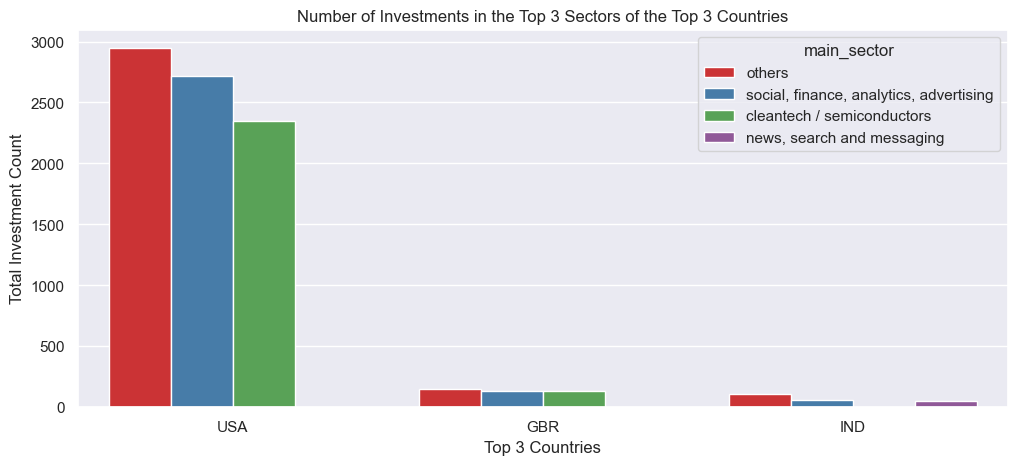

In [2692]:

plt.figure(figsize=[12,5],dpi=100,frameon=True)
sns.barplot(data=tot_cnt_invst, x='country_code', y='total_investment_count', hue='main_sector', palette="Set1")
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()

# End of Assignment